# Creacion de .csv por lugar para realizar clusters

In [1]:
import pandas as pd
import numpy as np

# Carga de Datasets

In [2]:
conexiones = pd.DataFrame.from_csv("dataset_final.csv", sep = ",")
conexiones.head(3)

,datetime,codigo,pauta_id,sitio_id,mac_usr,ip_local,ip_usr,so,navegador,url_ref,tiempo_espera,fabricante-dispositivo
0,2015-05-15 20:16:35,1,11,2,94:01:C2:97:96:CB,10.5.8.1,10.5.10.95,Android,SAFARI,http://10.5.8.1/status,00:00:00,"Samsung Electronics Co.,Ltd"
1,2015-05-15 20:18:15,2,5,2,8C:BF:A6:17:60:A0,10.5.8.1,10.5.9.24,Android,CHROME,http://10.5.8.1/status,00:00:00,"Samsung Electronics Co.,Ltd"
2,2015-05-15 20:18:24,3,19,3,74:AA:FE:A5:7E:90,10.5.0.1,10.5.0.176,Android,CHROME,http://10.5.0.1/status,00:00:00,NaN


In [3]:
conexiones["datetime"] = pd.to_datetime(conexiones["datetime"])
conexiones["mes"] = conexiones["datetime"].dt.month
conexiones["año"] = conexiones["datetime"].dt.year
conexiones["hora"] = conexiones["datetime"].dt.hour
conexiones["fecha"] = conexiones["datetime"].dt.date
conexiones["weekday"] = conexiones["datetime"].dt.weekday
conexiones.head(3)

,datetime,codigo,pauta_id,sitio_id,mac_usr,ip_local,ip_usr,so,navegador,url_ref,tiempo_espera,fabricante-dispositivo,mes,año,hora,fecha,weekday
0,2015-05-15 20:16:35,1,11,2,94:01:C2:97:96:CB,10.5.8.1,10.5.10.95,Android,SAFARI,http://10.5.8.1/status,00:00:00,"Samsung Electronics Co.,Ltd",5,2015,20,2015-05-15,4
1,2015-05-15 20:18:15,2,5,2,8C:BF:A6:17:60:A0,10.5.8.1,10.5.9.24,Android,CHROME,http://10.5.8.1/status,00:00:00,"Samsung Electronics Co.,Ltd",5,2015,20,2015-05-15,4
2,2015-05-15 20:18:24,3,19,3,74:AA:FE:A5:7E:90,10.5.0.1,10.5.0.176,Android,CHROME,http://10.5.0.1/status,00:00:00,NaN,5,2015,20,2015-05-15,4


In [4]:
conexionesFinal = conexiones[["datetime","sitio_id", "mac_usr", "so", "navegador", "fabricante-dispositivo", "hora", "weekday", "fecha", "mes", "año"]]
conexionesFinal.head(2)

,datetime,sitio_id,mac_usr,so,navegador,fabricante-dispositivo,hora,weekday,fecha,mes,año
0,2015-05-15 20:16:35,2,94:01:C2:97:96:CB,Android,SAFARI,"Samsung Electronics Co.,Ltd",20,4,2015-05-15,5,2015
1,2015-05-15 20:18:15,2,8C:BF:A6:17:60:A0,Android,CHROME,"Samsung Electronics Co.,Ltd",20,4,2015-05-15,5,2015


In [5]:
sitios = pd.DataFrame.from_csv("ma_sitios2.csv", sep = ",").reset_index()
sitios.head(3)

,sitio_id,nombre,siglas,ruc,ciudad,nombre_ubicacion,contacto,direccion,email,telefono,...,transparencia,longitud,latitud,ip,puerto,fecha,usuario_modif,bienvenida,formulario,router
0,1,ALBAN BORJA,ALBAN BORJ,920124541001,Guayaquil,Guayaquil,Fabricio Matamoros,Av. Carlos Julio Arosemena,administracion@albanborja.com,923154211,...,0,-2.168677,-79.916769,186.3.137.95,NaN,2016-09-19 13:28:32,fmatamoros,0,0,Mikrotik
1,2,VILLAGE PLAZA,VILLA,0,Guayaquil,Guayaquil,Gabriela,SAMBORONDON,NaN,NaN,...,0,-2.140406,-79.866376,186.3.144.18,NaN,2016-07-20 17:23:50,fmatamoros,0,0,NaN
2,3,CITY MALL,CITY M.,0,Guayaquil,Guayaquil,Gabriela,Alborada,NaN,NaN,...,0,-2.140951,-79.911774,186.3.153.140,NaN,2015-12-22 10:21:54,fmatamoros,0,0,NaN


In [6]:
places =[["Urdesa", [[-79.915581,-2.178119], [-79.901204,-2.146938]]],
             ["MallSur", [[-79.902062,-2.232042], [-79.894681,-2.226038]]],
             ["CityMall", [[-79.912663,-2.143936], [-79.905968,-2.137932]]],
             ["AlbanBorja", [[-79.918242,-2.170096], [-79.915066,-2.167523]]],
             ["Samborondon", [[-79.874897,-2.160447], [-79.852066,-2.116704]]],
             ["Aeropuerto", [[-79.886227,-2.152728], [-79.880562,-2.146338]]],
             ["Penias", [[-79.8776014239,-2.1855487464], [-79.873009,-2.175392]]],
             ["Quito", [[-78.586922,-0.395161], [-78.274155,0.021973]]],
             ["CentroConvenciones", [[-79.893479,-2.161755], [-79.883652,-2.154894]]],
             ["HiltonColon", [[-79.8998951912,-2.160929558], [-79.8962903023,-2.1576274229]]],
             ["MallSol", [[-79.8954641819,-2.157053837], [-79.8891341686,-2.1539258197]]],
             ["UniversidadGuayaquil", [[-79.9008607864,-2.1847947751], [-79.8959684372,-2.1791554991]]]]

In [7]:
def localizar(row, places):
    longitud = float(row["longitud"])
    latitud = float(row["latitud"])

    for placeName, ubicacion in places:
        SW, NE= ubicacion
        if (latitud <= NE[0] and longitud <=NE[1] and latitud >= SW[0] and longitud >= SW[1]):
            return placeName
    return "No ubicado"

In [8]:
sitios['localizacion'] = sitios[["longitud", "latitud"]].apply(lambda row: localizar(row, places), axis = 1)
sitios = sitios[["sitio_id","nombre", "longitud", "latitud", "localizacion"]]
sitios.head(3)

,sitio_id,nombre,longitud,latitud,localizacion
0,1,ALBAN BORJA,-2.168677,-79.916769,AlbanBorja
1,2,VILLAGE PLAZA,-2.140406,-79.866376,Samborondon
2,3,CITY MALL,-2.140951,-79.911774,CityMall


In [9]:
datos = pd.merge(conexionesFinal, sitios[["sitio_id","nombre", "longitud", "latitud", "localizacion"]], on = "sitio_id")
datos["hora"] = datos["hora"].apply(lambda x: str(x).rjust(2,"0") + "h")
datos.head(3)

,datetime,sitio_id,mac_usr,so,navegador,fabricante-dispositivo,hora,weekday,fecha,mes,año,nombre,longitud,latitud,localizacion
0,2015-05-15 20:16:35,2,94:01:C2:97:96:CB,Android,SAFARI,"Samsung Electronics Co.,Ltd",20h,4,2015-05-15,5,2015,VILLAGE PLAZA,-2.140406,-79.866376,Samborondon
1,2015-05-15 20:18:15,2,8C:BF:A6:17:60:A0,Android,CHROME,"Samsung Electronics Co.,Ltd",20h,4,2015-05-15,5,2015,VILLAGE PLAZA,-2.140406,-79.866376,Samborondon
2,2015-05-15 20:20:20,2,34:BE:00:05:16:18,Android,SAFARI,"Samsung Electronics Co.,Ltd",20h,4,2015-05-15,5,2015,VILLAGE PLAZA,-2.140406,-79.866376,Samborondon


In [10]:
datos = datos[["mac_usr","localizacion", "hora", "weekday", "fecha", "mes", "año"]]
datos.head()

,mac_usr,localizacion,hora,weekday,fecha,mes,año
0,94:01:C2:97:96:CB,Samborondon,20h,4,2015-05-15,5,2015
1,8C:BF:A6:17:60:A0,Samborondon,20h,4,2015-05-15,5,2015
2,34:BE:00:05:16:18,Samborondon,20h,4,2015-05-15,5,2015
3,BC:6E:64:71:73:97,Samborondon,20h,4,2015-05-15,5,2015
4,B8:6C:E8:C3:F8:C9,Samborondon,20h,4,2015-05-15,5,2015


In [12]:
agrupado = datos.groupby(["localizacion", "mac_usr"]).size().rename("cant_conexiones").reset_index()
agrupado.head()

,localizacion,mac_usr,cant_conexiones
0,Aeropuerto,00:00:02:99:6F:E8,2
1,Aeropuerto,00:00:3A:CF:68:3A,1
2,Aeropuerto,00:00:76:0A:8D:76,210
3,Aeropuerto,00:00:DA:88:6A:DA,1
4,Aeropuerto,00:00:DA:CF:4E:DA,1


# Separacion del Dataset por lugar

In [42]:
lugares = {}
lugares["aeropuerto"] = agrupado[agrupado["localizacion"] == "Aeropuerto"]
lugares["centroConvenciones"] = agrupado[agrupado["localizacion"] == "CentroConvenciones"]
lugares["mallSur"] = agrupado[agrupado["localizacion"] == "MallSur"]
lugares["cityMall"] = agrupado[agrupado["localizacion"] == "CityMall"]
"Separados"

'Separados'

# Obtencion de la diversidad por Usuario

In [ ]:
cont = 0
for lugar in lugares:
    dataframe = lugares[lugar]
    dataframe.columns = ["localizacion", "mac_usr", lugar]
    if cont == 0:
        data = dataframe[["mac_usr", lugar]]
    else:
        data = data.merge(dataframe[["mac_usr", lugar]],on= "mac_usr", how = "outer")
    cont += 1
"Procesados"

In [45]:
data = data.fillna(0)
data.head()

,mac_usr,centroConvenciones,aeropuerto,cityMall,mallSur
0,00:00:46:B8:63:2F,9.0,0.0,0.0,0.0
1,00:00:CD:4E:11:28,8.0,0.0,0.0,0.0
2,00:02:A7:5D:B5:EB,1.0,0.0,0.0,0.0
3,00:03:AA:E3:32:3C,2.0,0.0,0.0,0.0
4,00:03:AA:E3:36:49,6.0,0.0,0.0,0.0


In [47]:
data["total"] = data.apply(lambda row: row["centroConvenciones"] + row["aeropuerto"] + row["cityMall"] + row["mallSur"], axis = 1)

In [51]:
data =data.sort_values("total", ascending = False)
data.head()

,mac_usr,centroConvenciones,aeropuerto,cityMall,mallSur,total
32526,EC:59:E7:EF:95:16,1842.0,0.0,0.0,0.0,1842.0
9944,40:6F:2A:D5:37:2A,1376.0,0.0,0.0,0.0,1376.0
29503,D0:92:9E:CA:BC:A8,1268.0,0.0,0.0,0.0,1268.0
26352,BC:77:37:AE:1C:EE,1195.0,0.0,0.0,0.0,1195.0
58587,2C:D0:5A:72:6D:AA,0.0,1112.0,0.0,0.0,1112.0


In [57]:
for lugar in lugares:
    data[lugar+"_frecuencia(%)"] = data.apply(lambda row: row[lugar]* 100/row["total"], axis = 1)
    print "Terminado " + lugar

Terminado centroConvenciones
Terminado aeropuerto
Terminado cityMall
Terminado mallSur


In [58]:
data.head()

,mac_usr,centroConvenciones,aeropuerto,cityMall,mallSur,total,lugar_frecuencia(%),centroConvenciones_frecuencia(%),aeropuerto_frecuencia(%),cityMall_frecuencia(%),mallSur_frecuencia(%)
32526,EC:59:E7:EF:95:16,1842.0,0.0,0.0,0.0,1842.0,0.0,100.0,0.0,0.0,0.0
9944,40:6F:2A:D5:37:2A,1376.0,0.0,0.0,0.0,1376.0,0.0,100.0,0.0,0.0,0.0
29503,D0:92:9E:CA:BC:A8,1268.0,0.0,0.0,0.0,1268.0,0.0,100.0,0.0,0.0,0.0
26352,BC:77:37:AE:1C:EE,1195.0,0.0,0.0,0.0,1195.0,0.0,100.0,0.0,0.0,0.0
58587,2C:D0:5A:72:6D:AA,0.0,1112.0,0.0,0.0,1112.0,0.0,0.0,100.0,0.0,0.0


In [67]:
def calcularDiversidad(row, porcentajeImportancia, lugares):
    porcentajes = []
    scores = []
    for lugar in lugares:
        if row[lugar+"_frecuencia(%)"] > porcentajeImportancia:
            porcentajes += [porcentajeImportancia]
        else:
            porcentajes += [row[lugar+"_frecuencia(%)"]]
    
    for porcentaje in porcentajes:
        scores += [porcentaje/porcentajeImportancia]
    return sum(scores)/len(scores)
    

In [68]:
data["diversidad"] = data.apply(lambda row: calcularDiversidad(row, 15, list(lugares.keys())), axis = 1)

In [69]:
data= data.sort_values("diversidad", ascending = False)
data.head(20)

,mac_usr,centroConvenciones,aeropuerto,cityMall,mallSur,total,lugar_frecuencia(%),centroConvenciones_frecuencia(%),aeropuerto_frecuencia(%),cityMall_frecuencia(%),mallSur_frecuencia(%),diversidad
34998,FC:C2:DE:0C:84:A7,2.0,1.0,1.0,2.0,6.0,0.333333,33.333333,16.666667,16.666667,33.333333,1.000000
453,00:08:22:AA:B9:FB,1.0,1.0,1.0,1.0,4.0,0.250000,25.000000,25.000000,25.000000,25.000000,1.000000
33189,F0:27:65:EE:57:16,1.0,1.0,1.0,1.0,4.0,0.250000,25.000000,25.000000,25.000000,25.000000,1.000000
33004,F0:27:65:3C:A4:B1,2.0,1.0,1.0,2.0,6.0,0.333333,33.333333,16.666667,16.666667,33.333333,1.000000
4461,18:22:7E:CD:9E:CE,2.0,1.0,1.0,1.0,5.0,0.200000,40.000000,20.000000,20.000000,20.000000,1.000000
15571,70:11:24:BD:CF:AC,1.0,1.0,1.0,1.0,4.0,0.250000,25.000000,25.000000,25.000000,25.000000,1.000000
692,00:0A:F5:89:89:FF,6.0,3.0,7.0,5.0,21.0,0.238095,28.571429,14.285714,33.333333,23.809524,0.988095
397,00:08:22:90:BF:FB,1.0,4.0,1.0,1.0,7.0,0.142857,14.285714,57.142857,14.285714,14.285714,0.964286
26984,C0:BD:D1:A9:9E:50,1.0,1.0,1.0,4.0,7.0,0.571429,14.285714,14.285714,14.285714,57.142857,0.964286
922,00:12:36:1F:EF:DE,85.0,33.0,75.0,74.0,267.0,0.277154,31.835206,12.359551,28.089888,27.715356,0.955993


In [70]:
data.diversidad.value_counts()

0.250000    220718
0.500000      6427
0.750000       233
0.488095       164
0.458333       116
0.435185        95
0.401515        74
0.416667        72
0.388889        57
0.378205        37
0.369048        30
0.361111        29
0.354167        27
0.348039        22
0.342593        22
0.708333        17
0.738095        17
0.333333        17
0.685185        16
0.329365        15
0.337719        13
0.319444        11
0.726190        11
0.472222         9
0.620370         9
0.316667         9
0.325758         8
0.394928         7
0.651515         7
0.314103         7
             ...  
0.361111         1
0.964286         1
0.612613         1
0.263661         1
0.318027         1
0.298170         1
0.336207         1
0.502525         1
0.272523         1
0.271505         1
0.251618         1
0.777778         1
0.611111         1
0.335034         1
0.621951         1
0.416667         1
0.544118         1
0.628788         1
0.287453         1
0.557471         1
0.922414         1
0.273148    

In [88]:
data2 = data[["mac_usr", "diversidad", "total"]]
data2.head()

,mac_usr,diversidad,total
34998,FC:C2:DE:0C:84:A7,1.0,6.0
453,00:08:22:AA:B9:FB,1.0,4.0
33189,F0:27:65:EE:57:16,1.0,4.0
33004,F0:27:65:3C:A4:B1,1.0,6.0
4461,18:22:7E:CD:9E:CE,1.0,5.0


In [89]:
data2G = data2.groupby("diversidad").size().rename("cant").reset_index()
data2G = data2G.sort_values("cant", ascending = False)
data2G.head()

,diversidad,cant
0,0.250000,220718
167,0.500000,6427
210,0.750000,233
166,0.488095,164
156,0.458333,116


In [90]:
import seaborn as sns

In [91]:
import matplotlib.pyplot as plt

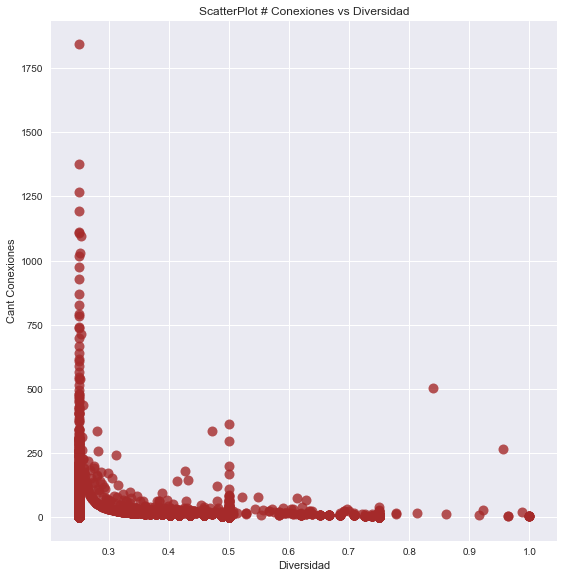

In [94]:
sns.lmplot(y='total', x='diversidad',
           data=data2,
           fit_reg=False,  
           scatter_kws={"marker": "D",
                        "s": 100, "color":"brown"},size=8)
plt.title('ScatterPlot # Conexiones vs Diversidad')
plt.xlabel('Diversidad')
plt.ylabel('Cant Conexiones')
plt.show()

In [99]:
data2.columns = ["mac_usr", "diversidad", "cant_conexiones"]
data2.to_csv("diversidad.csv", sep = ",", index = False)

# Generar Features de frecuencia de conexiones por rango de horas en los lugares 

In [100]:
datos.head()

,mac_usr,localizacion,hora,weekday,fecha,mes,año
0,94:01:C2:97:96:CB,Samborondon,20h,4,2015-05-15,5,2015
1,8C:BF:A6:17:60:A0,Samborondon,20h,4,2015-05-15,5,2015
2,34:BE:00:05:16:18,Samborondon,20h,4,2015-05-15,5,2015
3,BC:6E:64:71:73:97,Samborondon,20h,4,2015-05-15,5,2015
4,B8:6C:E8:C3:F8:C9,Samborondon,20h,4,2015-05-15,5,2015


In [106]:
def obtenerRangoHora(hora):
    hora = int(hora[:-1])
    return str((hora//4)*4) +":00" + "-" +str(((hora//4)+1)*4 -1) +":59"


In [110]:
datos3 = datos
datos3["rango_hora"] = datos3.hora.apply(lambda x: obtenerRangoHora(x))

In [111]:
datos3.head()

,mac_usr,localizacion,hora,weekday,fecha,mes,año,rango_hora
0,94:01:C2:97:96:CB,Samborondon,20h,4,2015-05-15,5,2015,20:00-23:59
1,8C:BF:A6:17:60:A0,Samborondon,20h,4,2015-05-15,5,2015,20:00-23:59
2,34:BE:00:05:16:18,Samborondon,20h,4,2015-05-15,5,2015,20:00-23:59
3,BC:6E:64:71:73:97,Samborondon,20h,4,2015-05-15,5,2015,20:00-23:59
4,B8:6C:E8:C3:F8:C9,Samborondon,20h,4,2015-05-15,5,2015,20:00-23:59


In [116]:
dataLugares = {}
dataLugares["aeropuerto"] = datos3[datos3["localizacion"] == "Aeropuerto"][["mac_usr", "rango_hora", "mes", "año"]]
dataLugares["centroConvenciones"] = datos3[datos3["localizacion"] == "CentroConvenciones"][["mac_usr", "rango_hora", "mes", "año"]]
dataLugares["mallSur"] = datos3[datos3["localizacion"] == "MallSur"][["mac_usr", "rango_hora", "mes", "año"]]
dataLugares["cityMall"] = datos3[datos3["localizacion"] == "CityMall"][["mac_usr", "rango_hora", "mes", "año"]]

In [163]:
for lugar in dataLugares:
    frame = dataLugares[lugar]
    frameG = frame.groupby(["mac_usr", "año", "mes", "rango_hora"]).size().rename("cant_conexiones").reset_index()
    frameG = frameG[["mac_usr", "rango_hora", "cant_conexiones"]].groupby(["mac_usr", "rango_hora"]).mean().add_prefix("mean_").reset_index()
    frameG["mean_cant_conexiones"] = frameG["mean_cant_conexiones"].apply(lambda x: int(round(x)))
    frameG = frameG.sort_values("mean_cant_conexiones", ascending = False)
    frameF = frameG.pivot(index = "mac_usr", columns = "rango_hora", values = "mean_cant_conexiones").reset_index()
    frameF = frameF.fillna(0)
    frameF["avg_monthly_conections"] = frameF.apply(lambda row: row["0:00-3:59"] + row["4:00-7:59"] + row["8:00-11:59"]
                                                   + row["12:00-15:59"] + row["16:00-19:59"] + row["20:00-23:59"], axis = 1)
    frameF = frameF.sort_values("avg_monthly_conections", ascending = False)
    frameF["[0:00-3:59](%)"] = aeroF.apply(lambda row: 100 * row["0:00-3:59"]/ row["avg_monthly_conections"], axis = 1)
    frameF["[4:00-7:59](%)"] = frameF.apply(lambda row: 100 * row["4:00-7:59"]/ row["avg_monthly_conections"], axis = 1)
    frameF["[8:00-11:59](%)"] = frameF.apply(lambda row: 100 * row["8:00-11:59"]/ row["avg_monthly_conections"], axis = 1)
    frameF["[12:00-15:59](%)"] = frameF.apply(lambda row: 100 * row["12:00-15:59"]/ row["avg_monthly_conections"], axis = 1)
    frameF["[16:00-19:59](%)"] = frameF.apply(lambda row: 100 * row["16:00-19:59"]/ row["avg_monthly_conections"], axis = 1)
    frameF["[20:00-23:59](%)"] = frameF.apply(lambda row: 100 * row["20:00-23:59"]/ row["avg_monthly_conections"], axis = 1)
    frameFinal = frameF[["mac_usr","avg_monthly_conections","[0:00-3:59](%)", "[4:00-7:59](%)", "[8:00-11:59](%)", "[12:00-15:59](%)", "[16:00-19:59](%)", "[20:00-23:59](%)"]]
    frameTotal = pd.merge(frameFinal, data2, on ="mac_usr")
    frameTotal.to_csv("./Clustering/"+lugar+".csv", sep = ",", index = False)
    print lugar + " generado"

centroConvenciones generado
aeropuerto generado
cityMall generado
mallSur generado


In [117]:
aero = dataLugares["aeropuerto"]

In [130]:
aeroG = aero.groupby(["mac_usr", "año", "mes", "rango_hora"]).size().rename("cant_conexiones").reset_index()
aeroG = aeroG[["mac_usr", "rango_hora", "cant_conexiones"]].groupby(["mac_usr", "rango_hora"]).mean().add_prefix("mean_").reset_index()

In [137]:
aeroG["mean_cant_conexiones"] = aeroG["mean_cant_conexiones"].apply(lambda x: int(round(x)))
aeroG = aeroG.sort_values("mean_cant_conexiones", ascending = False)
aeroG.head()

,mac_usr,rango_hora,mean_cant_conexiones
1550,00:14:D1:5C:98:CD,8:00-11:59,90
1546,00:14:D1:5C:98:CD,12:00-15:59,76
1547,00:14:D1:5C:98:CD,16:00-19:59,59
1548,00:14:D1:5C:98:CD,20:00-23:59,55
39310,3C:D0:F8:61:11:09,20:00-23:59,53


In [142]:
aeroF = aeroG.pivot(index = "mac_usr", columns = "rango_hora", values = "mean_cant_conexiones").reset_index()

In [143]:
aeroF = aeroF.fillna(0)
aeroF.head()

rango_hora,mac_usr,0:00-3:59,12:00-15:59,16:00-19:59,20:00-23:59,4:00-7:59,8:00-11:59
0,00:00:02:99:6F:E8,0.0,0.0,0.0,0.0,0.0,2.0
1,00:00:3A:CF:68:3A,0.0,0.0,0.0,0.0,1.0,0.0
2,00:00:76:0A:8D:76,0.0,15.0,9.0,1.0,0.0,21.0
3,00:00:DA:88:6A:DA,0.0,0.0,1.0,0.0,0.0,0.0
4,00:00:DA:CF:4E:DA,0.0,0.0,1.0,0.0,0.0,0.0


In [144]:
aeroF["avg_monthly_conections"] = aeroF.apply(lambda row: row["0:00-3:59"] + row["4:00-7:59"] + row["8:00-11:59"]
                                                          + row["12:00-15:59"] + row["16:00-19:59"] + row["20:00-23:59"], axis = 1)

In [146]:
aeroF = aeroF.sort_values("avg_monthly_conections", ascending = False)
aeroF.head()

rango_hora,mac_usr,0:00-3:59,12:00-15:59,16:00-19:59,20:00-23:59,4:00-7:59,8:00-11:59,avg_monthly_conections
1122,00:14:D1:5C:98:CD,48.0,76.0,59.0,55.0,46.0,90.0,374.0
110121,D0:92:9E:0F:27:14,49.0,44.0,37.0,52.0,40.0,40.0,262.0
23814,2C:D0:5A:72:6D:AA,40.0,43.0,30.0,42.0,40.0,45.0,240.0
845,00:0C:E7:80:B9:97,29.0,42.0,36.0,46.0,38.0,38.0,229.0
19509,24:E3:14:85:4D:79,28.0,36.0,46.0,28.0,21.0,50.0,209.0


In [149]:
aeroF["[0:00-3:59](%)"] = aeroF.apply(lambda row: 100 * row["0:00-3:59"]/ row["avg_monthly_conections"], axis = 1)
aeroF["[4:00-7:59](%)"] = aeroF.apply(lambda row: 100 * row["4:00-7:59"]/ row["avg_monthly_conections"], axis = 1)
aeroF["[8:00-11:59](%)"] = aeroF.apply(lambda row: 100 * row["8:00-11:59"]/ row["avg_monthly_conections"], axis = 1)
aeroF["[12:00-15:59](%)"] = aeroF.apply(lambda row: 100 * row["12:00-15:59"]/ row["avg_monthly_conections"], axis = 1)
aeroF["[16:00-19:59](%)"] = aeroF.apply(lambda row: 100 * row["16:00-19:59"]/ row["avg_monthly_conections"], axis = 1)
aeroF["[20:00-23:59](%)"] = aeroF.apply(lambda row: 100 * row["20:00-23:59"]/ row["avg_monthly_conections"], axis = 1)

In [150]:
aeroF.head()

rango_hora,mac_usr,0:00-3:59,12:00-15:59,16:00-19:59,20:00-23:59,4:00-7:59,8:00-11:59,avg_monthly_conections,[0:00-3:59](%),[4:00-7:59](%),[8:00-11:59](%),[12:00-15:59](%),[16:00-19:59](%),[20:00-23:59](%)
1122,00:14:D1:5C:98:CD,48.0,76.0,59.0,55.0,46.0,90.0,374.0,12.834225,12.299465,24.064171,20.320856,15.775401,14.705882
110121,D0:92:9E:0F:27:14,49.0,44.0,37.0,52.0,40.0,40.0,262.0,18.702290,15.267176,15.267176,16.793893,14.122137,19.847328
23814,2C:D0:5A:72:6D:AA,40.0,43.0,30.0,42.0,40.0,45.0,240.0,16.666667,16.666667,18.750000,17.916667,12.500000,17.500000
845,00:0C:E7:80:B9:97,29.0,42.0,36.0,46.0,38.0,38.0,229.0,12.663755,16.593886,16.593886,18.340611,15.720524,20.087336
19509,24:E3:14:85:4D:79,28.0,36.0,46.0,28.0,21.0,50.0,209.0,13.397129,10.047847,23.923445,17.224880,22.009569,13.397129


In [157]:
aeroFinal = aeroF[["mac_usr","avg_monthly_conections","[0:00-3:59](%)", "[4:00-7:59](%)", "[8:00-11:59](%)", "[12:00-15:59](%)", "[16:00-19:59](%)", "[20:00-23:59](%)"]]

In [158]:
aeroFinal.head()

rango_hora,mac_usr,avg_monthly_conections,[0:00-3:59](%),[4:00-7:59](%),[8:00-11:59](%),[12:00-15:59](%),[16:00-19:59](%),[20:00-23:59](%)
1122,00:14:D1:5C:98:CD,374.0,12.834225,12.299465,24.064171,20.320856,15.775401,14.705882
110121,D0:92:9E:0F:27:14,262.0,18.702290,15.267176,15.267176,16.793893,14.122137,19.847328
23814,2C:D0:5A:72:6D:AA,240.0,16.666667,16.666667,18.750000,17.916667,12.500000,17.500000
845,00:0C:E7:80:B9:97,229.0,12.663755,16.593886,16.593886,18.340611,15.720524,20.087336
19509,24:E3:14:85:4D:79,209.0,13.397129,10.047847,23.923445,17.224880,22.009569,13.397129


In [160]:
aero1 = pd.merge(aeroFinal, data2, on ="mac_usr")

In [161]:
aero1

,mac_usr,avg_monthly_conections,[0:00-3:59](%),[4:00-7:59](%),[8:00-11:59](%),[12:00-15:59](%),[16:00-19:59](%),[20:00-23:59](%),diversidad,cant_conexiones
0,00:14:D1:5C:98:CD,374.0,12.834225,12.299465,24.064171,20.320856,15.775401,14.705882,0.250000,374
1,D0:92:9E:0F:27:14,262.0,18.702290,15.267176,15.267176,16.793893,14.122137,19.847328,0.250000,785
2,2C:D0:5A:72:6D:AA,240.0,16.666667,16.666667,18.750000,17.916667,12.500000,17.500000,0.250000,1112
3,00:0C:E7:80:B9:97,229.0,12.663755,16.593886,16.593886,18.340611,15.720524,20.087336,0.250000,870
4,24:E3:14:85:4D:79,209.0,13.397129,10.047847,23.923445,17.224880,22.009569,13.397129,0.251618,1030
5,3C:D0:F8:61:11:09,177.0,15.254237,27.683616,12.994350,9.039548,5.084746,29.943503,0.250000,177
6,90:94:E4:0A:4B:E6,168.0,19.047619,8.333333,14.880952,19.047619,17.261905,21.428571,0.250000,1017
7,D8:EB:97:23:BE:30,164.0,14.634146,16.463415,20.731707,17.682927,14.024390,16.463415,0.250000,927
8,1C:B0:94:75:B9:A9,160.0,15.625000,20.000000,11.875000,16.250000,19.375000,16.875000,0.250000,792
9,D8:EB:97:23:BE:4B,119.0,8.403361,23.529412,23.529412,14.285714,13.445378,16.806723,0.250000,182
